1.0 value at Risk (VaR)
Valor en riesgo es una medida de riesgo equivalente a la miníma pérdida posible en cierto porcentaje del tiempo a lo largo de un periodo de tiempo, dadas unas condiciones de mercado asumidas.

El Var de 5% de un portafolio es de $2.2 millones para un periodo día a día

Los siguientes puntos son importantes para entender el VaR:
1. Puede ser medido tanto en unidades monetarias como términos porcentuales.
2. VaR es una pérdida mínima. Aeces suele decirse que el VaR es la máxima pérdida posible, lo cual es errado ya que lo máximo que puedo perder es el 100%.

3. El VaR hace referencia a un horizonte de tiempo, se espera que las pérdidas ocurran a lo largo de un periodo de tiempo dado.

## Calculo del VaR para un solo activo

In [5]:
import pandas as pd 
import numpy as np
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import matplotlib.pyplot as plt
from matplotlib import mlab
import datetime as dt
from matplotlib import style
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from scipy.stats import norm
import yfinance as yf

In [37]:
# Download data

df = yf.download('GOOG','2010-01-01','2019-01-31')
print("-----------------------------------------------")
print("Data para Google proveniente de Yahoo Finance")
df = df[['Close']]
df

[*********************100%%**********************]  1 of 1 completed
-----------------------------------------------
Data para Google proveniente de Yahoo Finance


,Close
Date,
2010-01-04,15.610239
2010-01-05,15.541497
2010-01-06,15.149715
2010-01-07,14.797037
2010-01-08,14.994298
...,...
2019-01-24,53.695000
2019-01-25,54.549500
2019-01-28,53.504002


In [38]:
#Calculamos los retornos
df['returns'] = df.Close.pct_change()
df['returns']

/var/folders/nt/32tjc1p53tz703st4wmbmcph0000gn/T/ipykernel_17952/733291025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.Close.pct_change()


Date
2010-01-04         NaN
2010-01-05   -0.004404
2010-01-06   -0.025209
2010-01-07   -0.023280
2010-01-08    0.013331
                ...   
2019-01-24   -0.001553
2019-01-25    0.015914
2019-01-28   -0.019166
2019-01-29   -0.008841
2019-01-30    0.026815
Name: returns, Length: 2284, dtype: float64

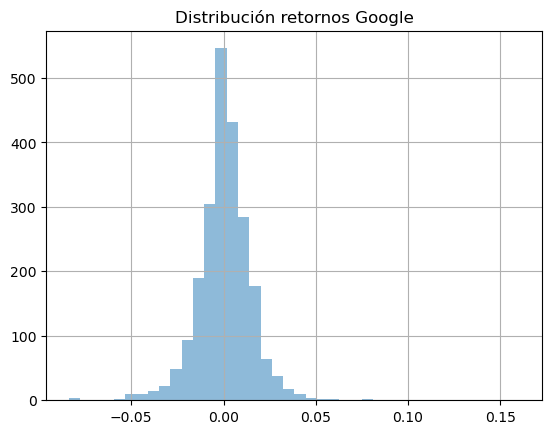

0.0006659298649059682

In [39]:
#Calcular retorno diario esperado
mean = np.mean(df['returns'])

#Usamos numpy para calcular la desviación estandar de los retornos diarios
std_dev = np.std(df['returns'])
df['returns'].hist(bins=40, histtype='stepfilled', alpha=0.5)
plt.title('Distribución retornos Google')
plt.show()
mean

In [40]:
#Calcular el Var con el inverso de la función
# de densidad acumulada normal usando el metodo
VaR_10 = norm.ppf(1-0.9, mean, std_dev)
VaR_5 = norm.ppf(1-0.95, mean, std_dev)
VaR_1 = norm.ppf(1-0.99, mean, std_dev)

print('VaR 10% (90% confidence level): ', VaR_10)
print('VaR 5% (95% confidence level): ', VaR_5)
print('VaR 1% (99% confidence level): ', VaR_1)

VaR 10% (90% confidence level):  -0.01914476581927642
VaR 5% (95% confidence level):  -0.02476082277201337
VaR 1% (99% confidence level):  -0.03529561161905538


El ejemplo calcula el VaR a un día, cómo podemos extender el resultado a un periodo de tiempo más amplio partiendo de los retornos diarios? Asuma un portafolio de 30 millones

se puede lograr multiplicando el VaR a un día por la raíz cuadrda del numero de dias que queremos extenderlo

5dia var @ 5%: 1.66
10dia var @ 5%: 2.35
15dia var @ 5%: 2.88
20dia var @ 5%: 3.32
25dia var @ 5%: 3.71
30dia var @ 5%: 4.07


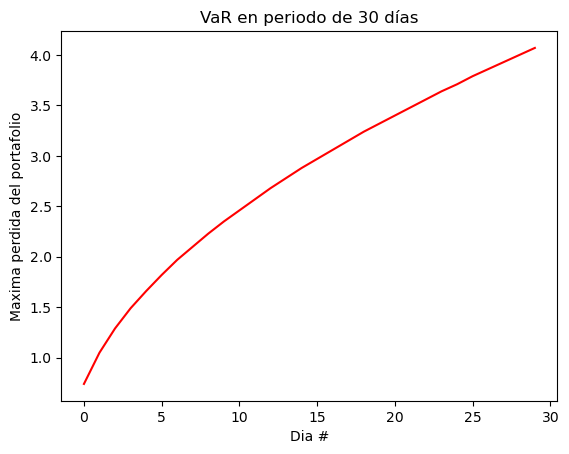

In [41]:
#Calcular el VaR n-dias
var_array = []
num_days = int(30)
for x in range(1, num_days+1):
    z=var_array.append(np.round(VaR_5 * np.sqrt(x)*-1*30,2))
    if x%5==0:
        print(str(x) + 'dia var @ 5%: ' + str(np.round(VaR_5 * np.sqrt(x)*-1*30,2)))
#Grafica 
plt.xlabel('Dia #')
plt.ylabel('Maxima perdida del portafolio')
plt.title('VaR en periodo de 30 días')
plt.plot(var_array, 'r')
 

## Ejercicio 2
Partiendo desde la misma fecha inicla del ejercicio anterior, añada información de la acción de Google hasta el día de ayer. Luego calcule el VaR 1%, VaR 5% y VaR 10%. Ha aumentado el riesgo del activo desde este año?

In [53]:
df2 = yf.download('GOOG','2023-01-01','2023-10-04')
df2=df2[['Close']]
print(df2.head(3))

[*********************100%%**********************]  1 of 1 completed
                Close
Date                 
2023-01-03  89.699997
2023-01-04  88.709999
2023-01-05  86.769997


In [54]:
df2['returns']=df2.Close.pct_change()

mean2= np.mean(df2['returns'])
mean2

/var/folders/nt/32tjc1p53tz703st4wmbmcph0000gn/T/ipykernel_17952/4242656839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['returns']=df2.Close.pct_change()


0.0022986946036345655

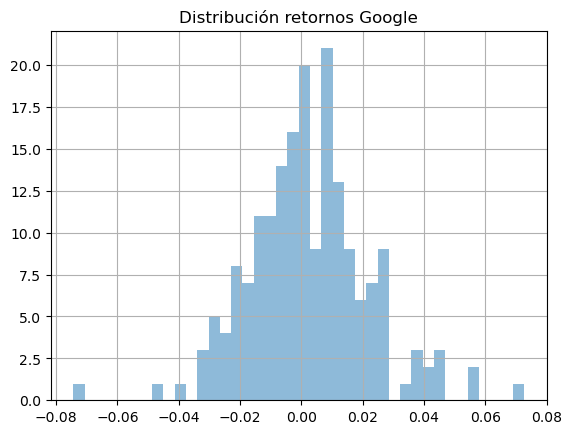

In [55]:
std_dev2 = np.std(df2['returns'])
df2['returns'].hist(bins=40, histtype='stepfilled', alpha=0.5)
plt.title('Distribución retornos Google')
plt.show()

In [57]:
#Calcular el VaR con el inverso de la función de densidad acumulada nomrla usando el metodo
# ppf() 'percentil point function'

VaR_10_2 = norm.ppf(1-0.9, mean2, std_dev2)
VaR_5_2 = norm.ppf(1-0.95, mean2, std_dev2)
VaR_1_2 = norm.ppf(1-0.99, mean2, std_dev2)

print('VaR 10% (90% Confidence label): ', VaR_10)
print('VaR 5% (95% Confidence label): ', VaR_5)
print('VaR 1% (99% Confidence label): ', VaR_1)

VaR 10% (90% Confidence label):  -0.02126226999782094
VaR 5% (95% Confidence label):  -0.027507300489817605
VaR 1% (99% Confidence label):  -0.03922193909305707


5 dia VaR @ 5%: 2.0
10 dia VaR @ 5%: 2.82
15 dia VaR @ 5%: 3.46
20 dia VaR @ 5%: 3.99
25 dia VaR @ 5%: 4.47
30 dia VaR @ 5%: 4.89


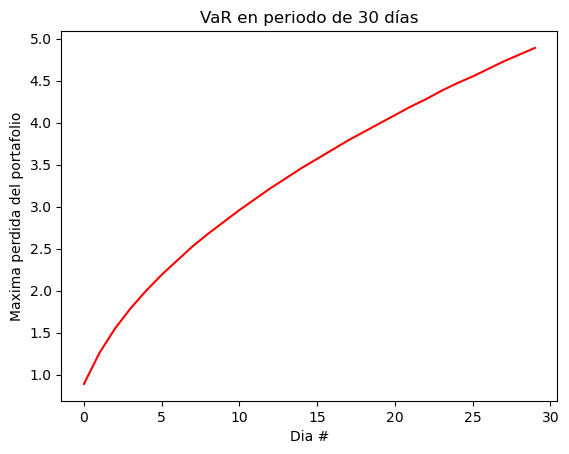

In [58]:
# Calcular el VaR n-dias
var_array2 = []
num_days2 = int(30)
for x in range(1, num_days2+1):    
    z=var_array2.append(np.round(VaR_5_2 * np.sqrt(x)*-1*30,2))
    if x%5==0:
      print(str(x) + " dia VaR @ 5%: " + str(np.round(VaR_5_2 * np.sqrt(x)*-1*30,2)))

# Gráfica
plt.xlabel("Dia #")
plt.ylabel("Maxima perdida del portafolio")
plt.title( "VaR en periodo de 30 días")
plt.plot(var_array2, "r")

# Ejercicio 3


Asuma un portafolio con retorno esperado de 0.0384% y una desviación estandar de 0.9960%, cual de los siguientes valores se aproxima más a un VaR del 1% para un portafolio de 300 millones COP

In [63]:
retorno = 0.0384
desviacion_estandar = 0.9960

VaR_1_ejercicio = norm.ppf(1-0.99,retorno,desviacion_estandar)
VaR_1_ejercicio
valor_portafolio = 300000000

In [66]:
print('La perdida máxima esperada es de: ', abs(VaR_1_ejercicio)*valor_portafolio)

La perdida máxima esperada es de:  683592744.7634032


# 1.4 VaR histórico (No paramétrico)
 simulemos a partir de una distribución normal los retornos de 10 activos hipotéticos

Text(0, 0.5, 'Retorno')

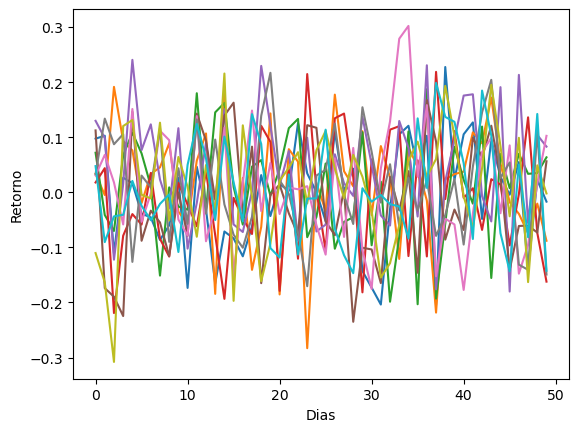

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mu = 0.01
sigma = 0.10
dias = 1000
num_assets = 10

returns = np.random.normal(mu, sigma, (dias, num_assets))

#Nombres hipoteticos 
names = ['Asset %s' %i for i in range(num_assets)]

# metemos los retornos en un dataframe
returns = pd.DataFrame(returns, columns=names)

#Grafica de los 50 primeros dias
plt.plot(returns.head(50))
plt.xlabel('Dias')
plt.ylabel('Retorno')

In [74]:
weights = np.ones((10,1))

#Normalizando los pesos
weights = weights / np.sum(weights)

def value_at_risk(value_invested, returns, weights, alpha=0.05,lookback_days=520):
    returns = returns.fillna(0.0)
    #multiplicamos los retornos en la ventana seleccionada por los pesos para obtener un retorno ponderado
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    #Buscamos el percentil adecuado en el vector de retornos y lo multiplicamos por el valor invertido
    return np.percentile(portfolio_returns, 100 * (alpha)) * value_invested

value_invested = 1000000

value_at_risk(value_invested, returns, weights, alpha=0.05)

-37572.90967757149

#### interpretación: 
Historicamente, no más del 5% de los días resultaron en pérdidas más extremas que 37.572,9096

## 1.5 Conditional Value at Risk (CVaR): ¿Qué pasa si los retornos no son normales?

El CVaR considerado como una mejor del VaR, ya que toma en cuenta la forma de la distribución de los retornos. También se le conoce como Expected Shortfall y es el valor espreado de todas las perdidas mayores del VaR

$$CVaR_{\alpha}(x) \approx \frac{1}{(1-\alpha)} \int_{f(x,y) \geq VaR_{\alpha}(x)} f(x,y)p(y)dy dx$$

In [81]:
def cvar(value_invested, returns, weights, alpha=0.05, lookback_days=520):
    # Llamamos a nuestra función de VaR basico
    var = value_at_risk(value_invested, returns, weights, alpha, lookback_days=lookback_days)
    returns = returns.fillna(0.0)
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    
    #Encontramos un ratio en lugar de una perdida monetaria
    var_pct_loss = var / value_invested
    
    #Promediamos luego los retornos menores al var_pct_loss
    return value_invested * np.nanmean(portfolio_returns[portfolio_returns < var_pct_loss])

Comparar calculos con ejercicio anterior

In [82]:
var_condicional = cvar(value_invested, returns, weights, lookback_days=500)
var_anterior = value_at_risk(value_invested, returns, weights, lookback_days=500)
var_condicional, var_anterior

(-56850.906982653076, -37168.581623181504)

**Interpretación:** el VaR condicional es mayor porque captura más información acerca de la forma de la distribución (momentos). Si las colas tienen más masa va a capturar ese fenómeno.

# 1.6 Caso adicional : EWMA
### 1.6. Caso adicional: EWMA

**EWMA (Media Móvil Exponencialmente Ponderada)** es una técnica estadística que se puede utilizar en el análisis de Value at Risk (VaR) para estimar la volatilidad de los rendimientos de un activo a lo largo del tiempo.

Primero, se recolecta los datos históricos de los retornos del activo. Supongamos que deseas estimar el VaR para una cartera de una unica acción. 

Calculamos los log-returns diarios de la accion utilizando la siguiente fórmula:
$log-return_{t} = ln(price_{t}) - ln(price_{t-1})$,


Calculamos la volatilidad diaria de los rendimientos de la acción utilizando EWMA. La fórmula para EWMA es:
$\sigma^{2}_{t} = \lambda \cdot \sigma^{2}_{t-1} + (1-\lambda)(r_{t-1}-\mu)^{2}$,
donde $\sigma^{2}_{t}$ es la estimación de la volatilidad en el momento t, $\lambda$ es el parámetro de decaimiento (una constante entre 0 y 1), $$r_{t-1} es el rendimiento diario en el momento t-1, y $\mu$ es la media de los rendimientos durante el período de tiempo.

Así, podemos calcular la volatilidad anualizada utilizando la siguiente fórmula:
volatilidad anualizada = $\sqrt(252)$*volatilidad diaria

Para calcuñlar  el VaR utilizando la volatilidad anualizada necesitamos a su vez el nivel de confianza deseado. Por ejemplo, si se busca calcular el VaR del 99%, multiplicamos la volatilidad anualizada por 2.33 (el z-score para el percentil 99 de la distribución normal estándar) y luego  ese resultado por el valor de la cartera.


In [88]:
import numpy as np
import pandas as pd 
from scipy.stats import norm
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from matplotlib.pyplot import mlab
import datetime as dt
from matplotlib import style
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import yfinance as yf

In [92]:
#Descargamos la data para la acción de Google en las siguientes fechas
df = yf.download('GOOG','2010-01-01','2019-01-31')
print("-----------------------------------------------")
print("Data para Google proveniente de Yahoo Finance")
#Conservamos solo el precio de cierre
returns_df = df[['Close']].reset_index()
print(df.head(3))
print(returns_df.head(3))

[*********************100%%**********************]  1 of 1 completed
-----------------------------------------------
Data para Google proveniente de Yahoo Finance
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-01-04  15.615220  15.678981  15.547723  15.610239  15.610239   78541293
2010-01-05  15.620949  15.637387  15.480475  15.541497  15.541497  120638494
2010-01-06  15.588072  15.588072  15.102393  15.149715  15.149715  159744526
        Date      Close
0 2010-01-04  15.610239
1 2010-01-05  15.541497
2 2010-01-06  15.149715


Significado de 
�
λ:
Ponderación: 
�
λ determina el peso asignado a las observaciones pasadas en el cálculo de la volatilidad. Un 
�
λ cercano a 1 dará más peso a las observaciones más antiguas, mientras que un 
�
λ cercano a 0 dará más peso a las observaciones recientes.

Reactividad: La elección de 
�
λ afecta la rapidez con la que el modelo responde a cambios en los datos observados. Un 
�
λ bajo hará que el modelo reaccione rápidamente a cambios recientes, mientras que un 
�
λ alto hará que el modelo sea más estable y menos sensible a fluctuaciones a corto plazo.

In [94]:
# Set the decay parameter lambda
lambda_param = 0.94

#Calculate the daily log-returns 
returns_df['log_returns'] = np.log(returns_df['Close']) - np.log(returns_df['Close'].shift(1))
returns_df = returns_df.dropna()

#Calculate the mean of the returns
mu = returns_df['log_returns'].mean()

#Initialize the volatility estimate
returns_df['volatility']= 0.0

# Calculate the daily volatility using EWMA
for i in range(2, len(returns_df)):
    returns_df.loc[i, 'volatility'] = np.sqrt(lambda_param * returns_df.loc[i-1, 'volatility']**2 + (1-lambda_param) * (returns_df.loc[i-1, 'log_returns'] - mu)**2)

#Calculate the annualized volatility
annualized_volatility = np.sqrt(252) * returns_df['volatility'].iloc[-2]

#Calculate the VaR at the 99% confidence level
z_score = norm.ppf(0.99)
portfolio_value = 10000000
VaR = portfolio_value *annualized_volatility *z_score

print('The estimated VaR at the 99% confidence level is:', VaR)

The estimated VaR at the 99% confidence level is: 7155615.314118258


In [95]:
!pwd

/Users/alejandrareyes
